In [250]:
"""
============================
Doughnut chart after Raworth
============================

Demo of bar plot on a polar axis.
T. Rackow, July 2020
"""
from matplotlib import pyplot as plt
import numpy as np
import random
from matplotlib import patches
from matplotlib import text as mtext
import math

In [251]:
# started from https://matplotlib.org/2.0.1/examples/pie_and_polar_charts/polar_bar_demo.html

# ranges:
# [0,300] -> inner bars
# [310,390] -> safe and just space for humanity
# [400,500] -> outer bars

#### configure topics and data ranges here

In [252]:
# config
topics_outercircle=['climate change','freshwater use','nitrogen and\nphosphorus cycles','ocean acidification','chemical pollution','atmospheric aerosol\nloading','ozone depletion','biodiversity loss','land use change']
topics_innercircle=['water','income','education','resilience','voice','jobs','energy','social\nequity','gender\nequalty','health','food']

In [253]:
# set outer values to [0,100] percent
numTopics=np.size(topics_outercircle)
data_outercircle=100*np.random.rand(numTopics) # generate data

# set inner values to [0,100] percent
numInTopics=np.size(topics_innercircle)
data_innercircle=100*np.random.rand(numInTopics) # generate data

#### define bar widths and split the circle into pie pieces

In [254]:
# define outer bar plots with polar coordinates
theta=np.arange(0.,2*np.pi,2.*np.pi/numTopics)
barwidth = (2*np.pi)/numTopics * 1.0
environmental_ceiling = 400. # start outer bar plots here

In [255]:
# define inner bar plots with polar coordinates
thetain=np.arange(0.,2*np.pi,2.*np.pi/numInTopics)
inbarwidth = (2*np.pi)/numInTopics * 1.0
social_low = 0. # start inner bar plots from zero

### plot the doughnut after Raworth:

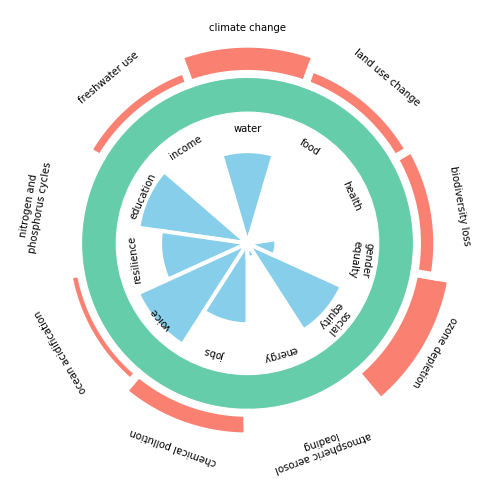

In [258]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")

# doughnut (green circle plus smaller white circle)
gcircle = plt.Circle((0.,0.), 390., transform=ax.transProjectionAffine + ax.transAxes, color='mediumaquamarine', zorder=-2)
wcircle = plt.Circle((0.,0.), 310., transform=ax.transProjectionAffine + ax.transAxes, color='w', zorder=-1)
ax.add_artist(gcircle)
ax.add_artist(wcircle)

# outer circle
bars = ax.bar(theta, data_outercircle, width=barwidth, bottom=environmental_ceiling, color='salmon', edgecolor='w', linewidth=8)
# label the bars
for x, bar, rotation, label in zip(theta, bars, np.rad2deg(theta), topics_outercircle):
    lab = ax.text(x, environmental_ceiling+110., label, ha='center', va='center', rotation=rotation, rotation_mode="anchor") # environmental_ceiling+bar.get_height()  

# inner circle
bars2 = ax.bar(thetain, 3.*data_innercircle, width=inbarwidth, bottom=social_low, color='skyblue', edgecolor='w', linewidth=4)
# label the bars
for x, bar, rotation, label in zip(thetain, bars2, np.rad2deg(thetain), topics_innercircle):
    lab = ax.text(x,social_low+270. , label, ha='center', va='center', rotation=rotation, rotation_mode="anchor")  # bar.get_height()

#ax.set_theta_direction(-1)

plt.axis('off') # 'on' for setting up the data

plt.show()